In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/MyDrive/project_folder/paper_replications/dc_gan/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/MyDrive/project_folder/paper_replications/dc_gan/'
/content/gdrive/MyDrive/project_folder/paper_replications/dc_gan


In [9]:
!ls

dcgan.pdf  dcgan.py	inference.ipynb  __pycache__  test.ipynb
DCGAN.pth  dcmodels.py	logs		 readme.md


In [73]:
import torch
from dcmodels import Discriminator, Generator, CatFaces
import matplotlib.pyplot as plt
import math

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CHANNEL_IMG = 3
Z_DIM = 100
FEATURES_GEN = 64

checkpoint = torch.load("DCGAN.pth", map_location=torch.device('cpu'))

gen = Generator(Z_DIM, FEATURES_GEN, CHANNEL_IMG)
gen.load_state_dict(checkpoint["gen_state_dict"])
gen.eval();

In [64]:
def show_random_noise(generator, random_noise):
  img = torch.squeeze(gen(noise))
  img = (img - img.min()) / (img.max() - img.min())
  img = img * 255
  img = img.int()
  plt.imshow(img.permute(1, 2, 0).detach().numpy())
  plt.axis("off")

In [69]:
noise = torch.randn(1, Z_DIM, 1, 1)

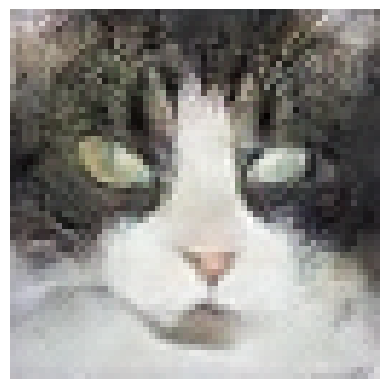

In [70]:
show_random_noise(gen, noise)

In [112]:
def show_batch(generator, batch_size=12):
  fig, axes = plt.subplots(math.ceil(batch_size**0.5), math.ceil(batch_size**0.5))
  m, n = axes.shape
  count = 0
  for r in range(m):
    for c in range(n):
      if count < batch_size:
        noise = torch.randn(1, Z_DIM, 1, 1)
        img = torch.squeeze(gen(noise))
        img = (img - img.min()) / (img.max() - img.min())
        img = img * 255
        img = img.int()
        axes[r,c].imshow(img.permute(1, 2, 0).detach().numpy())
      axes[r,c].axis("off")
      count += 1
  fig.savefig(f"generated_images/{batch_size}catfacesingrid.png")
  plt.show()

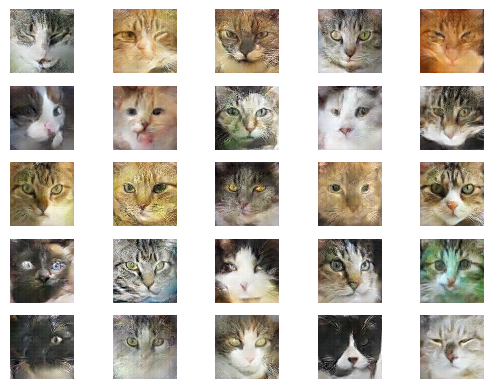

In [113]:
show_batch(gen, 25)

In [143]:
def go_along_dimension(generator, noise, alpha, dimension, steps):
  fig, axes = plt.subplots(math.ceil(steps**0.5), math.ceil(steps**0.5))
  m, n = axes.shape
  count = 0
  name = f"faceswithdelta{alpha}at{dimension}with{steps}steps"
  add = torch.zeros_like(noise)
  add[:, dimension, :, :] = alpha
  for r in range(m):
    for c in range(n):
      if count < steps:
        img = torch.squeeze(gen(noise + (add*count)))
        img = (img - img.min()) / (img.max() - img.min())
        img = img * 255
        img = img.int()
        axes[r,c].imshow(img.permute(1, 2, 0).detach().numpy())
        axes[r,c].set_title(f"Step {count}")
      axes[r,c].axis("off")
      count += 1
  fig.suptitle(f"Steps with {alpha} change per step in dimension {dimension}")
  return fig, axes, name

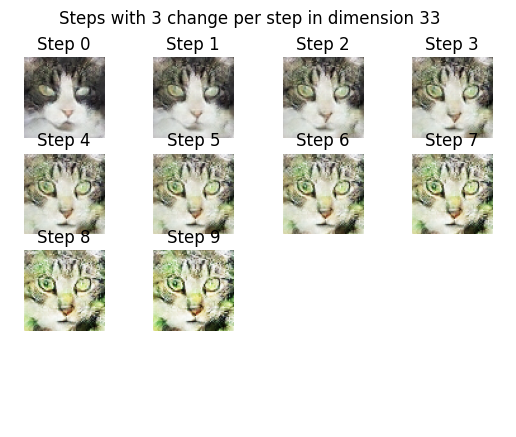

In [192]:
fig, axes, name = go_along_dimension(gen, noise, 3, 33, 10);
axes;

In [185]:
fig.savefig(f"generated_images/{name}.png")